In [1]:
import pandas as pd
data=pd.read_table('housing.txt')
data.head()

,LSTAT,INDUS,NOX,RM,MEDV
0,0,4.98,2.31,0.538,6.575
1,1,9.14,7.07,0.469,6.421
2,2,4.03,7.07,0.469,7.185
3,3,2.94,2.18,0.458,6.998
4,4,5.33,2.18,0.458,7.147


# select  the mosst correclated variavle to MEDV 

In [36]:
c a dire la variable qui a le plus d'effet SUR medv qui est le target donc on utilise .corr() 

SyntaxError: unterminated string literal (detected at line 1) (178291952.py, line 1)

In [20]:
# select  the mosst correclated variavle to MEDV
# plot the correlation matrix : on a choisiiile x
data.corr()

,LSTAT,INDUS,NOX,RM,MEDV,MEDV_theoriqur,MEDV_theorique,erreur
LSTAT,1.000000,1.164598e-01,0.077283,-0.426736,-0.292626,-1.164598e-01,-1.164598e-01,-2.801580e-01
INDUS,0.116460,1.000000e+00,0.567031,0.402239,-0.614110,-1.000000e+00,-1.000000e+00,2.056872e-16
NOX,0.077283,5.670311e-01,1.000000,0.605432,-0.593455,-5.670311e-01,-5.670311e-01,-3.107319e-01
RM,-0.426736,4.022388e-01,0.605432,1.000000,-0.372898,-4.022388e-01,-4.022388e-01,-1.594978e-01
MEDV,-0.292626,-6.141096e-01,-0.593455,-0.372898,1.000000,6.141096e-01,6.141096e-01,7.892207e-01
MEDV_theoriqur,-0.116460,-1.000000e+00,-0.567031,-0.402239,0.614110,1.000000e+00,1.000000e+00,8.853410e-16
MEDV_theorique,-0.116460,-1.000000e+00,-0.567031,-0.402239,0.614110,1.000000e+00,1.000000e+00,8.853410e-16
erreur,-0.280158,2.056872e-16,-0.310732,-0.159498,0.789221,8.853410e-16,8.853410e-16,1.000000e+00


In [5]:
#|rho(INDUS, MEDV)| IS THE HIGHEST coefficient . thereby , Indus is the mostly correlated to mEDV tp medv . Indus wil be selected to develop
#the linear regression model.
# |rho(indusnmedv)| =0.61<0.75  it could be stated that indus and medv are slightly correlated
# sind rhi(indus.mdex) <0 the , indus and ledv vary opposite directions in indus rises , the prov=ce of the houses decreanses . 
# conversly , if the percentage of indesrual settings der=cress , the hiusses rise

the linear regression equation is : medv =a*indus+b

# devolop the linear regression model

In [30]:
import statsmodels.formula.api as smf

In [7]:
#step1 : create the linear regression model
model_SLR=smf.ols(formula='MEDV~INDUS',data=data).fit()

In [9]:
#step2 : extract the slope (a) and intercept(b)
b=model_SLR.params.iloc[0]
a=model_SLR.params.iloc[1]

In [10]:
# step3 : equation
print("MEDV =",a,"*INDUS +",b)

MEDV = -0.038767892047012 *INDUS + 6.598612478696699


In [12]:
print("MEDV={:.2f}*INDUS+{:.3F}".format(a,b))

MEDV=-0.04*INDUS+6.599


In [15]:
data['MEDV_theorique']=a*data['INDUS']+b
data.head()

,LSTAT,INDUS,NOX,RM,MEDV,MEDV_theoriqur,MEDV_theorique
0,0,4.98,2.31,0.538,6.575,6.405548,6.405548
1,1,9.14,7.07,0.469,6.421,6.244274,6.244274
2,2,4.03,7.07,0.469,7.185,6.442378,6.442378
3,3,2.94,2.18,0.458,6.998,6.484635,6.484635
4,4,5.33,2.18,0.458,7.147,6.391980,6.391980


In [16]:
data['erreur']=data['MEDV']-data['MEDV_theorique']

In [18]:
# calculer l'erreur statiqtique du modele
print("MSE est:{:.2f}".format((data['erreur']**2).mean()))

MSE est:0.11


In [19]:
model_SLR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     29.06
Date:                Wed, 01 May 2024   Prob (F-statistic):           2.10e-06
Time:                        19:00:52   Log-Likelihood:                -15.945
No. Observations:                  50   AIC:                             35.89
Df Residuals:                      48   BIC:                             39.71
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5986      0.106     62.011      0.000       6.385       6.813
INDUS         -0.0388      0.007     -5.391      0.000      -0.053      -0.024
==============================================================================
Omnibus:                        1.654   Durbin-Watson:                   1.070
Prob(Omnibus):                  0.437   Jarque-Bera (JB):                1.627
Skew:                           0.378   Prob(JB):                        0.443
Kurtosis:                       2.543   Cond. No.                         32.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# plot the scatter and the linear regression

In [21]:
# import the pyplot class
import matplotlib.pyplot as plt

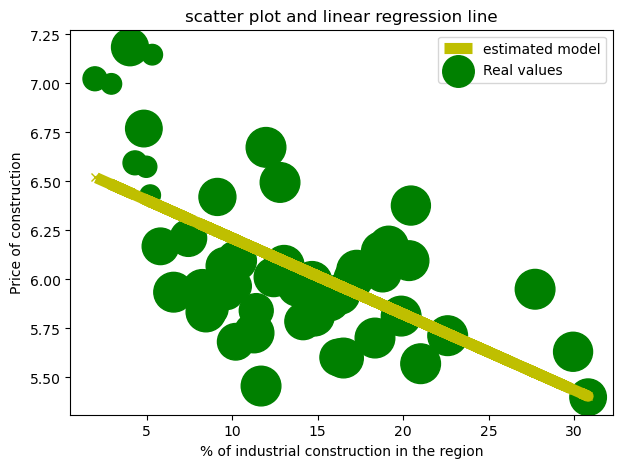

In [29]:
# lifecycle of a figure
#step1 : je declare la figure
plt.figure(figsize=(7,5))
#step2: add a title
plt.title("scatter plot and linear regression line")
#step3: Draw the linear regression line 
plt.plot(data['INDUS'],data['MEDV_theorique'],color='y',lw=8,ls='--',marker='x',label='estimated model')
# step4: draw the scatter plot
plt.scatter(data['INDUS'],data['MEDV'],c='g',s=data['NOX']*100,label="Real values")
# step5 : display the legend
plt.legend()
#step6: assign titles for x and y
plt.xlabel('% of industrial construction in the region')
plt.ylabel('Price of construction')


plt.show()

# apply multiple linear regression

from thesummary() we conclude that R_sqaured : 0.377
--> cariations  in INDUS impacts the prices MEDV with 37.7%
-- > if INDUS varies the MEDV would also vary with 37.7%
example : if induroal settings rise in a region , then the prices of related houses would decrease with about 38%
the R-squared < 50% then the adjustement quality given by INDUS is mediore we shoud invetigate other feattire within a multiole linear regression model

In [33]:
model_MLR=smf.ols(formula='MEDV~INDUS+LSTAT+NOX+RM',data=data).fit()

In [34]:
model_MLR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     13.02
Date:                Sun, 05 May 2024   Prob (F-statistic):           4.02e-07
Time:                        14:23:11   Log-Likelihood:                -8.5609
No. Observations:                  50   AIC:                             27.12
Df Residuals:                      45   BIC:                             36.68
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.2815      0.781     10.607      0.000       6.709       9.854
INDUS         -0.0222      0.008     -2.801      0.007      -0.038      -0.006
LSTAT         -0.0099      0.004     -2.616      0.012      -0.017      -0.002
NOX           -0.0519      0.036     -1.448      0.155      -0.124       0.020
RM            -2.5706      1.724     -1.491      0.143      -6.044       0.902
==============================================================================
Omnibus:                        3.728   Durbin-Watson:                   1.337
Prob(Omnibus):                  0.155   Jarque-Bera (JB):                3.341
Skew:                           0.631   Prob(JB):                        0.188
Kurtosis:                       2.897   Cond. No.                     1.39e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

the R-sqaured is improved . we can say the rml model has ana accuate quality of  ajjustement

In [35]:
# 05/5/2024 : photo tel l'exlication des valeur qui apparait dans le tab sammary () les valeurs statiqtiques 

In [ ]:
# 